<a href="https://colab.research.google.com/github/joykangangi/DataSciencePlayground/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#31394d'>Practical Exercise: Linear Regression</font>

In this notebook, we are going to train a simple linear regression model using the [`scikit-learn`](https://scikit-learn.org) library. Recall that linear regression is a *supervised learning* technique that is suitable for a *continuous/numerical* outcome variable.  

We begin by importing modules for data wrangling:

<!-- 
Even though its name is scikit-learn, it is imported as `sklearn`. It has many submodules.
For example, the `datasets` submodule has a group of simple datasets that can be used to evaluate models without having to use external files.

The Boston Housing dataset is available as a scikitlearn dataset.-->

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

## <font color='#31394d'> Get and Explore the Data </font>

We'll be using is the [Boston Housing](https://www.kaggle.com/c/boston-housing) dataset from Kaggle. This dataset consists of information about houses in the Boston area. Our goal is to **predict the typical price of a house**.

We import the data from the ``sklearn`` module as follows:

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

`sklearn` datasets behave like a dictionary. Let's see what this dictionary contains:

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The `DESCR` key includes a description of the dataset:

In [ ]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The `target` key holds the target/outcome variable; in this case, the median house value in thousands of dollars.

In [ ]:
boston["target"]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

The names of the features/independent variables are stored under the `feature_names` key:

In [ ]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Finally, the values of the features are stored under the `data` key:

In [ ]:
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Let's put the Boston data into a pandas dataframe:

In [ ]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

boston_df["PRICE"] = boston["target"]

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## <font color='#31394d'> Train/Test Split </font>

Before we create the regression model, we need to split the data into training and test subsets. This way, we train on one portion of the data (the "training set") and measure model performance on the other portion (the "test" set). Usually, the training set is larger than the test set.

<!--One way to avoid method overfitting and making sure that the model doesn't memorize the dataset is to do a train test split.-->
![title](media/train_test_split.png) 


![title](media/train_test.png)

We can use the `train_test_split` function from the `sklearn` module to easily split the dataset into training and test subsets. 

`train_test_split` works both with numpy arrays and pandas dataframes. If we pass it with a numpy array, it will return 4 different arrays: an X,y pair for training and another X,y pair for the test dataset. If we pass it a pandas dataframe, it will split the dataframe into two (training and test dataframes). 

We use the argument `test_size` to define the % size of the test dataset.

The full dataset is divided row-wise into training and test sets *at random*. This means that if we run the `train_test_split` twice, we will get different datasets. In order to make sure that we get the same splits again and again, we can fix the *random seed*, that is, the number that numpy uses to start its random number generation (used to calculate the splits). We can use the argument `random_state` to set the random seed for `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(boston_df, test_size=0.2, random_state=12345)


print('Training set has', train_df.shape[0], 'rows')
print('Test set has', test_df.shape[0], 'rows')
print('Train set has a shape', train_df.shape)
print('Test set has a shape', test_df.shape)

Training set has 404 rows
Test set has 102 rows
Train set has a shape (404, 14)
Test set has a shape (102, 14)


## <font color='#31394d'> Model Fitting </font>

The algorithms for linear regression are in the `linear_model` submodule of `sklearn`. Let's import the `LinearRegression` class and create (instantiate) an *estimator* object. Note that this is the standard procedure for any machine learning algo available in `sklearn`. 

In [ ]:
from sklearn.linear_model import LinearRegression
#algo + training data = model
model = LinearRegression()

We train the model (i.e. estimate its parameters) on the training data with the `fit` method. The `fit` method follows the same structure for pretty much every model in scikit-learn. We pass as arguments the features `X` and outcome variable `y`. The find out more, recall that you can type `?model.fit`.

Let's fit a simple linear model with house price as the outcome and number of rooms as the feature:

In [ ]:
# train['RM']  is a pandas series | Changing it into 2d from 1d?
# train[['RM']] is a pandas dataframe
# NB: the fit method expects X to be a dataframe, not a series 
# X is the features, y is the the label

model.fit(X=train_df[["RM"]], y=train_df["PRICE"])

LinearRegression()

Now that the linear regression model is trained (fitted), it has two additional attributes: `coef_` is an array containing the estimated coefficients/slopes for each feature, and `intercept_` contains the estimated intercept term.

In [ ]:
model.intercept_ # theta0 estimate

-38.140815462868034

In [ ]:
model.coef_ # theta1 estimate

array([9.63798633])

###### For Num of rooms vs Price target
- y = c + mx
- f(X) = -38.14 + 9.63798x 

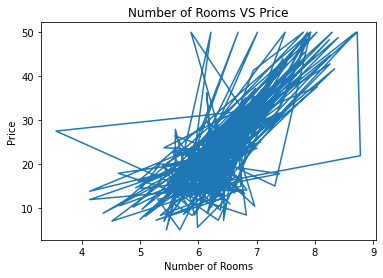

In [ ]:
# plot graph 
import matplotlib.pyplot as plt
plt.plot(train_df['RM'], train_df['PRICE'])
plt.title("Number of Rooms VS Price")
plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.show()

In [ ]:
print('The estimated regression function is:\n\nave price =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* rooms')

The estimated regression function is:

ave price = -38.14 + 9.64 * rooms


🚀 <font color='#d9c4b1'> Exercise: </font> Does the estimated slope make sense to you?
    
🚀 <font color='#d9c4b1'> Exercise: </font> Does the estimated intercept make sense to you? Hint: How would you interpret it?

### My Answers:
1. The slope and intercept are okay. The gradient is positive showing there is a positive relation between the House Price and the Number of Rooms. 

In practice, we would have *first* produced some plots and done some exploratory analysis before assuming a linear relationship between price and the number of rooms. 

Let's see what how well our model describes the training data:

In [ ]:
#plt.gca().set(xlim=(0,2.6))
#sns.regplot(x=train_df[['RM']], y=train_df['PRICE'], scatter = False)
#sns.regplot(x=train_df[['RM']], y=train_df['PRICE'], x_estimator= np.mean)

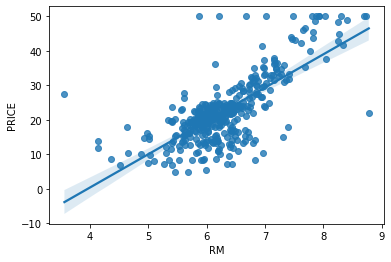

In [ ]:
#Line of best fit
sns.regplot(x=train_df[['RM']], y=train_df['PRICE'])

## <font color='#31394d'> Model Evaluation </font>

Once the model is trained, we can use the estimator object's `predict` method to get predicted house prices for the test set:

In [ ]:
y_hat = model.predict(test_df[['RM']])
y_hat

array([21.26773226, 28.08178859, 18.7714938 , 22.01949519, 18.97389151,
       17.34507182, 23.7061428 , 23.37845126, 22.09659908, 13.53806722,
       26.69391856, 19.71601646, 28.33237623, 18.11611073, 18.99316748,
       21.56650983, 19.87022424, 29.72024627, 11.54300405, 17.36434779,
       21.07497253, 23.32062334, -0.90927428, 27.21436982, 31.72494742,
       25.00727095, 20.14008786, 25.13256477, 16.50656701, 26.90595426,
       25.80722382, 24.45790573,  9.69251068, 11.84178163, 16.80534459,
       23.7061428 , 24.94944303, 18.42452629, 28.8528275 , 19.77384438,
       25.80722382, 15.49457845, 23.01220778, 18.56909608, 27.98540873,
       20.3232096 , 24.61211351, 25.40242839, 16.29453131, 13.89467272,
       20.86293683, 20.48705536, 23.04112174, 23.31098536, 31.5996536 ,
       21.00750663, 24.10130024, 39.62809621, 15.77408005, 32.0911909 ,
       20.93040274, 20.78583294, 12.67064845, 22.91582792, 24.1302142 ,
       30.35635336, 17.63421141, 37.33425546, 15.76444206, 29.55

Let's compute some performance metrics. We can either do this by hand...

In [ ]:
np.mean((test_df['PRICE'] - y_hat)**2) # mean squared error 

48.20056297353019

...Or we can use the functions available scikit-learn's `metrics` submodule. These functions take the actual values and predicted values of the outcome variable as arguments:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_squared_error(y_true=test_df['PRICE'], y_pred=y_hat)

48.20056297353019

In [ ]:
mean_absolute_error(y_true=test_df['PRICE'], y_pred=y_hat)

4.199936841471352

The magnitudes of the MSE and MAE are dependent on how the outcome variable is measured. They are therefore not comparable across datasets, but are useful for model and feature selection on a given dataset.

Let's visualize the actual price against the predicted price. If the model was perfect, the predicted values would equal the observed values, and all the points would lie on the diagonal line through the origin:

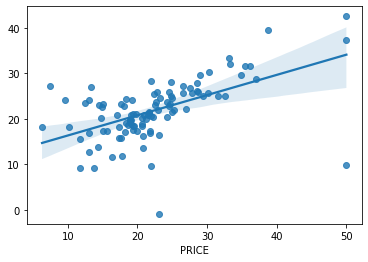

In [ ]:
sns.regplot(x=test_df[['PRICE']], y=y_hat) 

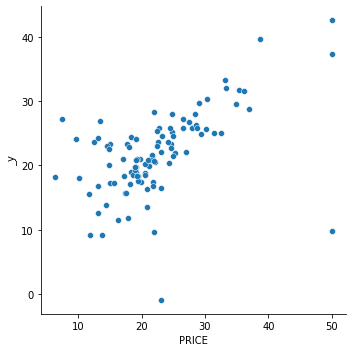

In [ ]:
sns.relplot(x=test_df['PRICE'], y=y_hat, kind="scatter")

🚀 <font color='#d9c4b1'> Exercise: </font> Regress price against age and determine if this model is better than the one that uses the number of rooms as a feature. 

🚀 <font color='#d9c4b1'> Advanced Exercise: </font> Write a function that, for any single feature, regresses price against that feature on the training set, and computes the evaluation metrics on the test set. Then use your function to determine which feature is best at predicting price. 

In [ ]:
# EXERCISE
model.fit(X=train_df[["AGE"]], y=train_df["PRICE"])


LinearRegression()

In [ ]:
model.coef_

array([-0.1310044])

In [ ]:
model.intercept_

31.652068729737714

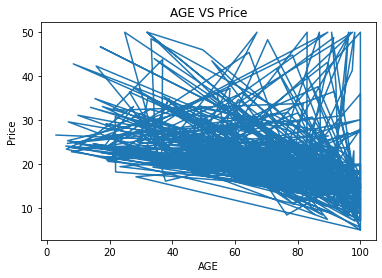

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_df['AGE'], train_df['PRICE'])
plt.title("AGE VS Price")
plt.xlabel("AGE")
plt.ylabel("Price")
plt.show()

In [ ]:
print('The estimated regression function is:\n\nave price =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* age')

The estimated regression function is:

ave price = 31.65 + -0.13 * age


### The Price vs Age linear function is: f(X) = 31.65 - 0.13*age
### The slope is negative showing that the variables are inversely related. As the age increases, the price reduces. 

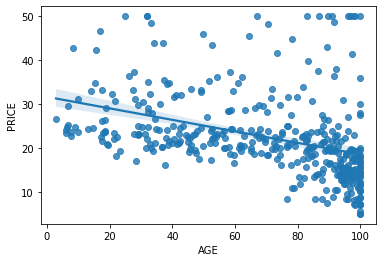

In [ ]:
sns.regplot(x=train_df[['AGE']], y=train_df['PRICE'])

In [ ]:
#Predict House Price given the AGE 
y_hat_age = model.predict(test_df[['AGE']])
y_hat_age

array([19.69136732, 25.44246033, 24.68263483, 23.17608427, 22.35075657,
       18.55162907, 22.99267812, 26.97521177, 19.52106161, 19.04944578,
       21.18481744, 19.27215325, 24.53853   , 23.83110625, 20.09748095,
       24.52542956, 23.09748163, 30.34202476, 18.55162907, 25.33765682,
       27.43372716, 19.29835413, 18.55162907, 22.31145525, 28.78307244,
       28.84857464, 20.01887831, 28.65206805, 27.87914211, 19.52106161,
       20.84420601, 19.28525369, 19.67826688, 19.36385633, 19.20665106,
       30.78743971, 27.3158232 , 25.58656517, 28.8354742 , 20.79180425,
       27.76123815, 22.40315833, 29.01888036, 29.22848739, 27.99704607,
       18.55162907, 28.88787596, 22.59966493, 20.17608359, 19.16734974,
       18.90534094, 25.9271766 , 20.37259018, 20.07128007, 26.26778803,
       20.20228447, 18.69573391, 21.69573459, 26.83110694, 27.18481881,
       19.07564666, 21.19791788, 19.33765545, 18.78743699, 19.42935853,
       26.85730782, 27.577832  , 24.63023307, 21.63023239, 29.58

In [ ]:
mean_squared_error(y_true = test_df['PRICE'], y_pred = y_hat_age)

58.070195147093244

In [ ]:
mean_absolute_error(y_true=test_df['PRICE'], y_pred=y_hat_age)

5.380907587002128

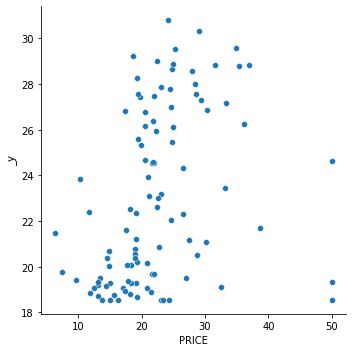

In [ ]:
sns.relplot(x =test_df['PRICE'], y=y_hat_age, kind='scatter')

### Room numbers has a better model compared to AGE. Because AGE has a larger MSE and MAE than Room Numbers. 

In [125]:
# Advanced Exercise: 
# Write a function that, for any single feature, regresses price against that feature on the training set,
# and computes the evaluation metrics on the test set.
# Then use your function to determine which feature is best at predicting price.

def regress_feature(feature: str):
  model.fit(X=train_df[[feature]], y=train_df["PRICE"])
  print("The feature is: ",feature)

  print("The coefficient is : ",model.coef_)
  print("The intercept is: ",model.intercept_)
  print('The estimated regression function is: ave price =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* ', feature,"\n")
   
  #plt.figure(figsize=(10,4)) 
  #plt.subplot(121)
  sns.regplot(x=train_df[[feature]], y=train_df['PRICE'])
  plt.title("Trained Linear Regression of Housing Prices on {} ".format(feature))

  plt.subplots_adjust(wspace=0.5)
  
  y_hat = model.predict(test_df[[feature]])
  print("The prediced House price given feature {} are:\n {} \n".format(feature, y_hat))

  mse = mean_squared_error(y_true = test_df['PRICE'], y_pred = y_hat)
  print("The Mean Squared Error is: ", mse)
  mae = mean_absolute_error(y_true=test_df['PRICE'], y_pred= y_hat)
  print("The Mean Absolute Error is: ", mae)

  #plt.subplot(1,2,2)
  sns.relplot(x =test_df['PRICE'], y=y_hat, kind='scatter')
  plt.title("ReLational Plot for Predicted VS True Price")  

The feature is:  CRIM
The coefficient is :  [-0.41846633]
The intercept is:  24.161688799210427
The estimated regression function is: ave price = 24.16 + -0.42 *  CRIM 

The prediced House price given feature CRIM are:
 [23.99107589 24.14320514 22.13812371 21.7245367  17.64378275  2.76307814
 24.14208784 24.15308932 23.62878866 22.62247757 24.09947959 22.31111351
 24.11428075 19.03664794 24.08998878 24.11652373 24.06162513 24.13841789
 12.17020128 22.83782871 24.14267369 24.06757991 18.50310336 24.11384973
 24.15620271 23.97681874 23.76173123 24.1437073  24.08678751 21.35054915
 23.95539327 23.83821851 22.61463969 23.18624796 23.67973276 24.12475496
 24.1338022  24.14734796 24.12374227 24.11253156 24.15540762 20.48248259
 24.13463077 24.1313751  24.14703411 23.59975547 24.139259   24.13548025
 19.11992274 24.05545275 23.46845747 24.06082586 20.60801831 22.6162466
 24.13861038 24.07313714 24.01938514 24.11112551 24.10496987 24.14490411
 23.57004018 21.77988305 23.13783559 23.92827665 18

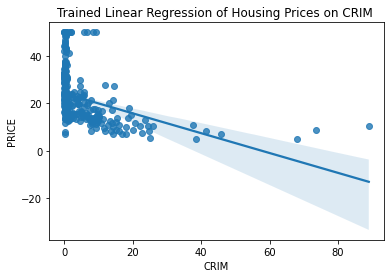

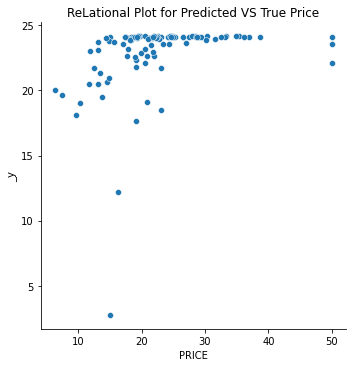

In [126]:
#'CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO','B' 'LSTAT']
#features = ['CRIM', 'ZN' ,'INDUS' ,'CHAS' ,'NOX' ,'RM' ,'AGE', 'DIS' ,'RAD' ,'TAX' ,'PTRATIO','B' ,'LSTAT']
#for feature in features:
regress_feature(feature = 'CRIM')

## <font color='#31394d'> Cross Validation </font>

Cross validation is an alternative approach to evaluate out-of-sample model performance. To do cross validation, we simply split the data into *K* folds, and for each fold, we train the model on the data from the *K*-1 remaining folds and evaluate on the one that was not included in the training set. That way, we get out-of-sample predictions and errors for every data point, so we don't rely on a single test set. 

For example, a 5 fold cross validation would look like this:

![title](media/cross_validation.png)

The `cross_val_score` function in `scikit-learn` computes your choice of evaluation metric for each fold. To use this function, we first need to see what "scoring methods" are available:

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

Looks like it defines the evaluation metrics such that "bigger is better". So, if we want to use MSE, for example, we need to choose "neg_mean_squared_error" (the negative MSE)...

In [ ]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

cv_scores = cross_val_score(estimator=model, X=df[['RM']], y=df['PRICE'], scoring="neg_mean_squared_error", cv=5)
cv_scores

Note that running this function again will produce different results since the data are split into folds randomly each time the function is called. 

The cross-validated MSE for the simple regression model of price against room is therefore:

In [ ]:
-cv_scores.mean()

🚀 <font color='#d9c4b1'> Exercise: </font> Compute the CV score for price regressed against another feature in the dataset. Which model is best?

If we want to get more information about each split, we can use the `cross_validate` function instead. It also accepts multiple scoring functions/evaluation metrics. Think of `cross_val_score` as the simplified version of `cross_validate`...

In [ ]:
from sklearn.model_selection import cross_validate
scoring_functions = {"negMSE": "neg_mean_squared_error", "negMAE": "neg_mean_absolute_error"}
cv_info = cross_validate(estimator=model, X=df[['RM']], y=df['PRICE'], scoring=scoring_functions, cv=10, return_train_score=True)
cv_df = pd.DataFrame(cv_info)
cv_df

We get results for each one of the folds:
- fit time = how long it took to train the model
- score time = how long it took to make predictions and compute the score
- test and train scores are given for each one of the scoring functions